Comparing azlearn KNeighborsClassifier and sklearn KNeighborsClassifier

Accuracy comparison
azlearn KNeighborsClassifier accuracy: 0.9298
sklearn KNeighborsClassifier accuracy: 0.9298


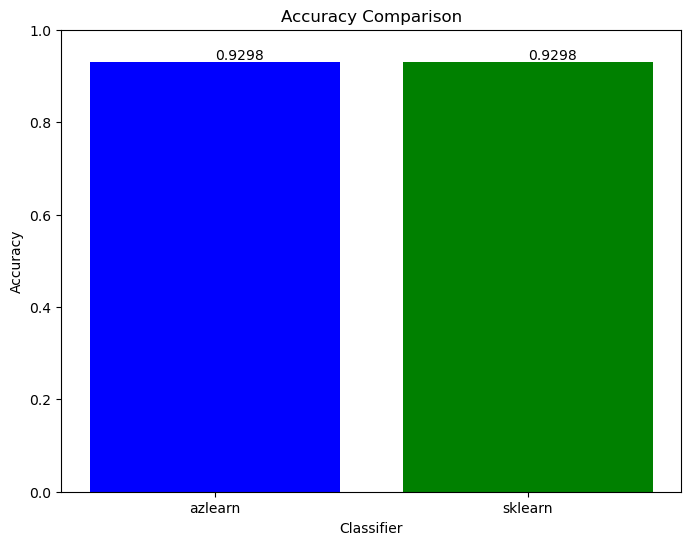

In [1]:
import sys
sys.path.insert(1, '../azlearn')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as SklearnKNeighborsClassifier
from sklearn.metrics import accuracy_score
from azlearn.neighbors.KNN import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

print("Comparing azlearn KNeighborsClassifier and sklearn KNeighborsClassifier")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train azlearn KNeighborsClassifier model
az_knn_model = KNeighborsClassifier(n_neighbors=3)
az_knn_model.fit(X_train, y_train)

# Train sklearn KNeighborsClassifier model (for comparison)
sklearn_knn_model = SklearnKNeighborsClassifier(n_neighbors=3)
sklearn_knn_model.fit(X_train, y_train)

# Make predictions
y_pred_az = az_knn_model.predict(X_test)
y_pred_sklearn = sklearn_knn_model.predict(X_test)

# Evaluate models on the test set
accuracy_az = accuracy_score(y_test, y_pred_az)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

# Print the accuracy comparison
print("\nAccuracy comparison")
print(f"azlearn KNeighborsClassifier accuracy: {accuracy_az:.4f}")
print(f"sklearn KNeighborsClassifier accuracy: {accuracy_sklearn:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
classifiers = ['azlearn', 'sklearn']
accuracies = [accuracy_az, accuracy_sklearn]
bars = plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.ylim(0, 1.0)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom') 

plt.show()
